In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
data.shape


data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
nx.__version__

'2.0'

In [4]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [5]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [6]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [7]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [8]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [9]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [10]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [11]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

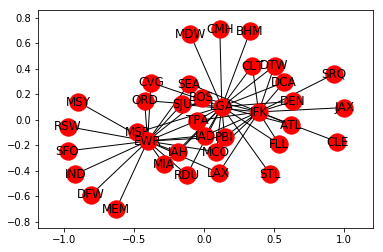

In [12]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. 

In [13]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

0.09047619047619047

In [14]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [15]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [16]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [17]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [18]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### ASSIGNMENT-4 (100 Points)

Please use the Airlines_graph.csv for the following questions.

1. How many maximal cliques we can spot in this airline network? (25 Points)

2. List the most busiest/popular airport. (25 Points) Hint: Degree Centrality

3. As a thought leader, identify 6 new routes to recommend. Hint: pairs are not symmetric so ORD-LAX and LAX-ORD two separate routes (50 Points)



In [19]:
# How many maximal cliques we can spot in this airline network? 
clique = list(nx.find_cliques(FG))
len(clique)

57

In [20]:
clique

[['JFK', 'CLE'],
 ['JFK', 'CLT'],
 ['JFK', 'LAX'],
 ['JFK', 'FLL'],
 ['JFK', 'SJU'],
 ['JFK', 'PBI'],
 ['JFK', 'BOS'],
 ['JFK', 'JAX'],
 ['JFK', 'DEN'],
 ['JFK', 'SRQ'],
 ['JFK', 'ATL'],
 ['JFK', 'IAD'],
 ['JFK', 'DCA'],
 ['JFK', 'SEA'],
 ['JFK', 'TPA'],
 ['JFK', 'MCO'],
 ['JFK', 'DTW'],
 ['MEM', 'EWR'],
 ['BOS', 'EWR'],
 ['EWR', 'SFO'],
 ['EWR', 'LAX'],
 ['EWR', 'SJU'],
 ['EWR', 'MIA'],
 ['EWR', 'DFW'],
 ['EWR', 'MSY'],
 ['EWR', 'IND'],
 ['EWR', 'RDU'],
 ['EWR', 'PBI'],
 ['EWR', 'ORD'],
 ['EWR', 'MSP'],
 ['EWR', 'IAD'],
 ['EWR', 'IAH'],
 ['EWR', 'SEA'],
 ['EWR', 'TPA'],
 ['EWR', 'MCO'],
 ['EWR', 'CVG'],
 ['EWR', 'RSW'],
 ['LGA', 'CLT'],
 ['LGA', 'FLL'],
 ['LGA', 'MIA'],
 ['LGA', 'STL'],
 ['LGA', 'RDU'],
 ['LGA', 'PBI'],
 ['LGA', 'BHM'],
 ['LGA', 'ORD'],
 ['LGA', 'MSP'],
 ['LGA', 'DEN'],
 ['LGA', 'ATL'],
 ['LGA', 'IAD'],
 ['LGA', 'IAH'],
 ['LGA', 'DCA'],
 ['LGA', 'TPA'],
 ['LGA', 'MCO'],
 ['LGA', 'MDW'],
 ['LGA', 'CMH'],
 ['LGA', 'CVG'],
 ['LGA', 'DTW']]

In [21]:
# List the most busiest/popular airport.
d=nx.degree_centrality(FG) 
d

{'EWR': 0.5714285714285714,
 'MEM': 0.02857142857142857,
 'LGA': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'JFK': 0.4857142857142857,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'CMH': 0.02857142857142857,
 'MSP': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'CLT': 0.05714285714285714,
 'TPA': 0.08571428571428572,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'JAX': 0.02857142857142857,
 'RDU': 0.05714285714285714,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'IAH': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'BOS': 0.0571428

In [24]:
sorted_names = sorted(d, key=d.__getitem__, reverse=True)
for k in sorted_names:
    print("{} : {}".format(k, d[k]))

EWR : 0.5714285714285714
LGA : 0.5714285714285714
JFK : 0.4857142857142857
PBI : 0.08571428571428572
MCO : 0.08571428571428572
IAD : 0.08571428571428572
TPA : 0.08571428571428572
FLL : 0.05714285714285714
SEA : 0.05714285714285714
DEN : 0.05714285714285714
ORD : 0.05714285714285714
MIA : 0.05714285714285714
MSP : 0.05714285714285714
CLT : 0.05714285714285714
DCA : 0.05714285714285714
SJU : 0.05714285714285714
ATL : 0.05714285714285714
DTW : 0.05714285714285714
LAX : 0.05714285714285714
RDU : 0.05714285714285714
IAH : 0.05714285714285714
CVG : 0.05714285714285714
BOS : 0.05714285714285714
MEM : 0.02857142857142857
CMH : 0.02857142857142857
BHM : 0.02857142857142857
SRQ : 0.02857142857142857
MSY : 0.02857142857142857
JAX : 0.02857142857142857
MDW : 0.02857142857142857
DFW : 0.02857142857142857
SFO : 0.02857142857142857
STL : 0.02857142857142857
IND : 0.02857142857142857
RSW : 0.02857142857142857
CLE : 0.02857142857142857


the most busiest/popular airport: EWR, LGA, JFK. 

In [23]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not FG.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')]


In [24]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            
            # Place the appropriate return statement
            return False

In [25]:
path_exists(FG, 'LGA','JFK')

Path does not exist between nodes LGA and JFK


False

In [26]:
path_exists(FG, 'EWR', 'JFK')

Path does not exist between nodes EWR and JFK


False

The 6 new routes to recommend: [('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')]